# Classic PINN

Let's solve an inverse PINN problem. The purpose of this notebook is to show that mathematical solutions can be discovered but they are not a physical solution. This can be seen in the results:

- we succesfully recover u(x,t)
- we do not recover alpha(x)

Essentially, what is hapenning is that the network u(x,t) learns everything alone so alpha(x) is not required to do anything (i.e: an horizontal line)

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..", "")))

import torch
from src.data_generator.diffusion_equations import DiffusionEquationDataset
from src.train.train import train
from src.figures.loss_function import plot_losses
from src.figures.figures import plot_sample, plot_physical_property
from src.models.basic import alpha_network, u_network
from src.loss_function.loss_function import Loss


# For PyTorch random
torch.manual_seed(45)

# Create Dataset
dataset = DiffusionEquationDataset(n_samples=1, nx=100, nt=100,T=100, L=1)

# Define PINNS
alpha_net = alpha_network()
u_net = u_network()

# training
u_net.train()
alpha_net.train()

lr = 1e-2
optimizer = torch.optim.Adam(list(u_net.parameters()) + list(alpha_net.parameters()), lr=lr)
loss = Loss()
losses = train(
    loss_function=loss,
    optimizer=optimizer,
    dataset=dataset,
    u_net=u_net,
    alpha_net=alpha_net,
    epochs=3000
)


Epoch 0: Loss = 2.2923e-01
Epoch 20: Loss = 9.0957e-02
Epoch 40: Loss = 7.4645e-02
Epoch 60: Loss = 6.6923e-02
Epoch 80: Loss = 6.5134e-02
Epoch 100: Loss = 6.4144e-02
Epoch 120: Loss = 6.2593e-02
Epoch 140: Loss = 5.9636e-02
Epoch 160: Loss = 5.5018e-02
Epoch 180: Loss = 4.9610e-02
Epoch 200: Loss = 4.3023e-02
Epoch 220: Loss = 3.6595e-02
Epoch 240: Loss = 3.0727e-02
Epoch 260: Loss = 2.5012e-02
Epoch 280: Loss = 2.0492e-02
Epoch 300: Loss = 1.7045e-02
Epoch 320: Loss = 1.4127e-02
Epoch 340: Loss = 1.1954e-02
Epoch 360: Loss = 1.0458e-02
Epoch 380: Loss = 9.2534e-03
Epoch 400: Loss = 8.3146e-03
Epoch 420: Loss = 7.6162e-03
Epoch 440: Loss = 7.0737e-03
Epoch 460: Loss = 6.6456e-03
Epoch 480: Loss = 6.2993e-03
Epoch 500: Loss = 6.2895e-03
Epoch 520: Loss = 5.5284e-03
Epoch 540: Loss = 5.6522e-03
Epoch 560: Loss = 4.3554e-03
Epoch 580: Loss = 3.3742e-03
Epoch 600: Loss = 2.8945e-03
Epoch 620: Loss = 2.5382e-03
Epoch 640: Loss = 2.2748e-03
Epoch 660: Loss = 2.0755e-03
Epoch 680: Loss = 1.

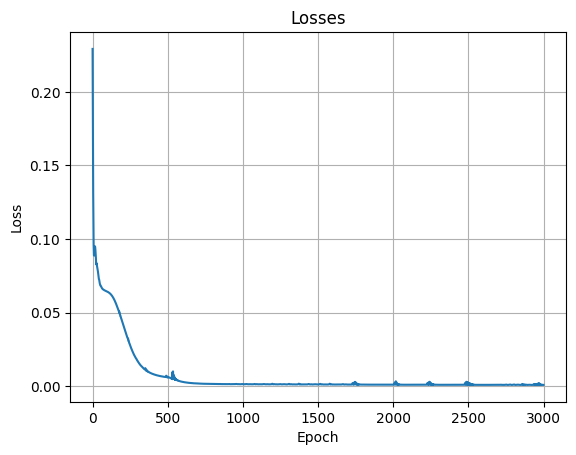

In [2]:
plot_losses(losses=[l.detach().numpy() for l in losses])

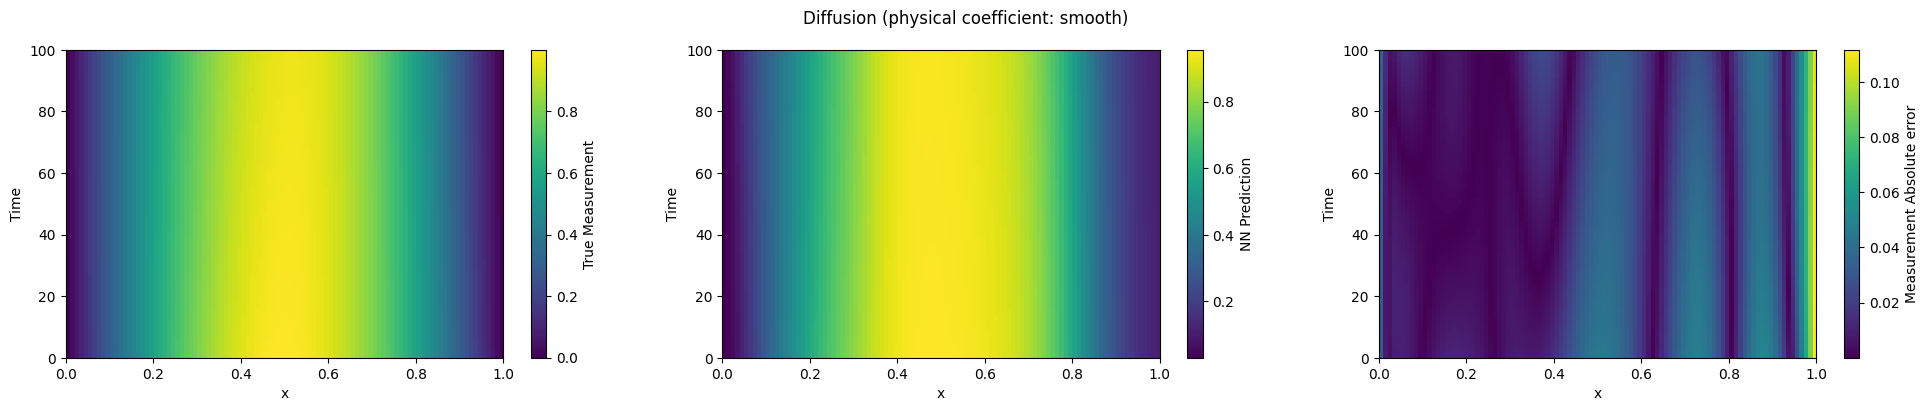

In [3]:
u_net.eval()
alpha_net.eval()
sample = dataset[0]

u_xt = u_net(xt=sample['xt'])
plot_sample(sample, u_xt, xt_pred_mesh=sample)

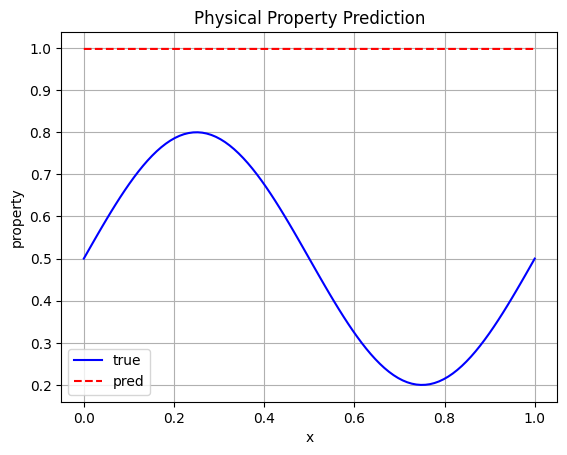

In [4]:
x = sample['x'].detach().numpy()[:,0]
property_pred = alpha_net(x=sample['x']).detach().numpy()[:,0]
property_true = sample["alpha"].detach().numpy()

plot_physical_property(x=x, property_pred=property_pred, property_true=property_true)